### imports

In [4]:
from utils import lmo_fro, lmo_spectral, prox_l1, grad_gb, prox_mcp
from BCD import load_dataset, Hadamard_BCD

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from problems import generateWH, run_MoreauNSD, run_VS

## Run algorithms

In [5]:
# D = load_dataset("synthetic", m = 250, n = 250)
# D = load_dataset("olivetti")
# D = load_dataset("spectrometer")
# D = load_dataset("football")
# D = load_dataset("miserables")
# D = load_dataset("low_rank_synthetic")
W, H = generateWH()
D = W@H
F_min = np.linalg.norm(W, 1)

print(D.shape)
norm_D = np.linalg.norm(D, 'fro')**2

K = 1_000
rank = 10

loss_NSD, dist_W_prox_NSD, WHs_NSD = run_MoreauNSD(D, rank, max_iter = K)

# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")

# loss = run_MoreauNSD(D, 10, lmo = lmo_fro)
# plt.semilogy(loss/norm_D, label = 'l2 lmo')

loss_VS, dist_W_prox_VS, WHs_VS = run_VS(D, rank, max_iter = K)


(100, 100)


100%|██████████| 1000/1000 [00:00<00:00, 17445.95it/s]


## Plots

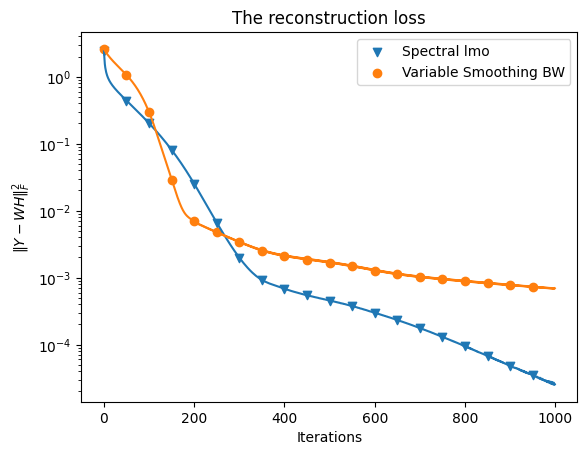

In [7]:
plt.semilogy(loss_NSD/norm_D)
plt.scatter(np.arange(len(loss_NSD))[::50], loss_NSD[::50]/norm_D, label = 'Spectral lmo', marker="v")

plt.semilogy(loss_VS/norm_D)
plt.scatter(np.arange(len(loss_VS))[::50], loss_VS[::50]/norm_D, label = 'Variable Smoothing BW', marker="o")

# plt.semilogy(loss/norm_D)
# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")
# plt.semilogy(loss/norm_D)
# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")
# W1, H1, W2, H2, error, times = Hadamard_BCD(D, r=rank, maxiter= K)
# print(len(error))
# plt.semilogy(error)
# plt.scatter(np.arange(len(error))[::50], error[::50], label = 'BCD', marker="^")

plt.ylabel(r'$\|Y - WH\|_F^2$')
plt.xlabel('Iterations')
plt.title('The reconstruction loss')

plt.legend()
plt.show()
    

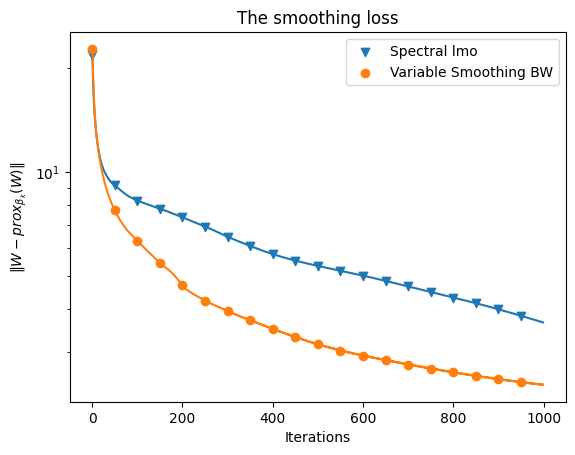

In [9]:
plt.semilogy(dist_W_prox_NSD)
plt.scatter(np.arange(len(dist_W_prox_NSD))[::50], dist_W_prox_NSD[::50], label = 'Spectral lmo', marker="v")

plt.semilogy(dist_W_prox_VS)
plt.scatter(np.arange(len(dist_W_prox_VS))[::50], dist_W_prox_VS[::50], label = 'Variable Smoothing BW', marker="o")


plt.ylabel(r'$\|W - prox_{\beta_k}(W)\|$')
plt.xlabel('Iterations')
plt.title('The smoothing loss')

plt.legend()
plt.show()

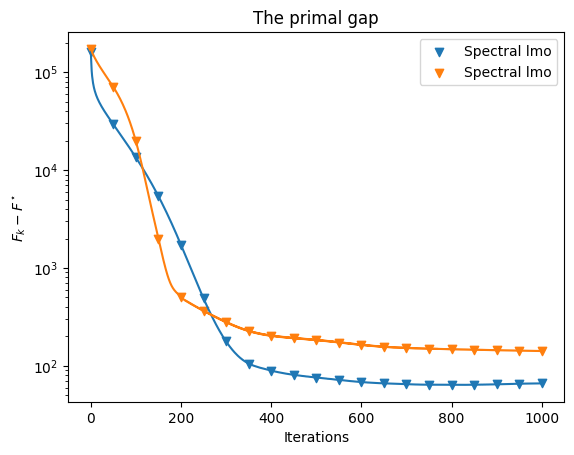

In [12]:
ls_NSD = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_NSD):
    ls_NSD[i] = np.linalg.norm(D - W@H, 'fro')**2 + np.linalg.norm(W, 1) - F_min
plt.semilogy(ls_NSD)
plt.scatter(np.arange(len(ls_NSD))[::50], ls_NSD[::50], label = 'Spectral lmo', marker="v")

ls_VS = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_VS):
    ls_VS[i] = np.linalg.norm(D - W@H, 'fro')**2 + np.linalg.norm(W, 1) - F_min
plt.semilogy(ls_VS)
plt.scatter(np.arange(len(ls_VS))[::50], ls_VS[::50], label = 'Spectral lmo', marker="v")

plt.ylabel(r'$F_k - F^\star$')
plt.xlabel('Iterations')
plt.title('The primal gap')

plt.legend()
plt.show()
    